In [1]:
import os
import cv2
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
from os.path import join as pjoin

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
HOME  = pjoin(os.getcwd(), "drive", "MyDrive", "Projects", "Face Retrieval")

In [ ]:
os.listdir(HOME)

['haarcascade_frontalface_default.xml',
 'lfw-deepfunneled',
 'dataset_lfw',
 'dataset_lfw_cropped',
 'dataset_lfw_pairs',
 'Face_Retrieval.ipynb']

## Face Detection - Haar Cascade

In [ ]:
class FaceDetector():

  def __init__(self,faceCascadePath):
    
    self.faceCascade=cv2.CascadeClassifier(faceCascadePath)

  def detect(self, image, scaleFactor=1.1,minNeighbors=5,minSize=(30,30)):
      
    rects = self.faceCascade.detectMultiScale(
      image,
      scaleFactor=scaleFactor,
      minNeighbors=minNeighbors,
      minSize=minSize
    )

    return rects

In [ ]:
HAAR_CASCADE_PATH = pjoin(HOME, "haarcascade_frontalface_default.xml")

In [ ]:
face_dectector = FaceDetector(HAAR_CASCADE_PATH)

In [ ]:
def show_image(image):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
def detect_face(image, scaleFactor, minNeighbors, minSize):
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces=face_dectector.detect(image_gray,
                   scaleFactor=scaleFactor,
                   minNeighbors=minNeighbors,
                   minSize=minSize)

    for x, y, w, h in faces:
        #detected faces shown in color image
        cv2.rectangle(image,(x,y),(x+w, y+h),(127, 255,0),3)

    show_image(image)

## Data Preprocessing/Manipulation


### Face Croping Dataset 

In [ ]:
SOURCE_PATH = pjoin(HOME, "dataset_lfw")
DESTIN_PATH = pjoin(HOME, "dataset_lfw_cropped")

In [ ]:
len(os.listdir(SOURCE_PATH))

5749

In [ ]:
failures = []
for folder in os.listdir(SOURCE_PATH):
  try:
    os.mkdir(pjoin(DESTIN_PATH,folder))
  except OSError as error: 
    print(f"Failed to create {folder}")
    failures.append(folder)

In [ ]:
len(failures)

0

In [ ]:
len(os.listdir(DESTIN_PATH))

5749

In [ ]:
failures = []
detect_fail = []

count = 0

for folder in os.listdir(SOURCE_PATH):
  for image_name in os.listdir(pjoin(SOURCE_PATH, folder)):
    image = cv2.imread(pjoin(SOURCE_PATH, folder, image_name))
    faces = face_dectector.detect(
                  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
                  scaleFactor=1.1,
                  minNeighbors=5,
                  minSize=(30,30)
                )
    try:
      x,y,w,h = faces[0]
      # show_image(image[y:y+h, x:x+w])
      try:
        result = cv2.imwrite(pjoin(DESTIN_PATH, folder,image_name),image[y:y+h, x:x+w])
        if not result:
          failures.append(folder)
      except:
        failures.append(folder)
    except:
      detect_fail.append(folder)
  count += 1
  if count % 500 == 0:
    print(count)
print(f"Completed. Detect failure = {len(detect_fail)}, Save failure = {len(failures)}")
    

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
Completed. Detect failure = 84, Save failure = 0


In [ ]:
detect_fail

['Christian_Fittipaldi',
 'Charles_Mathews',
 'Budd_Schulberg',
 'Buddy_Ryan',
 'Brian_Schneider',
 'Brian_Lara',
 'Brandon_Webb',
 'Brandon_Larson',
 'Bill_Clinton',
 'Bill_Clinton',
 'Ben_Glisan',
 'Ben_Curtis',
 'Barbara_Esbin',
 'Barbara_Boxer',
 'Augustin_Calleri',
 'Arnold_Schwarzenegger',
 'Ariel_Sharon',
 'Andy_Roddick',
 'Abdullah_Gul',
 'Gerhard_Schroeder',
 'George_W_Bush',
 'George_P_Bush',
 'George_HW_Bush',
 'Dereck_Whittenburg',
 'Darvis_Patton',
 'Colin_Montgomerie',
 'Colin_Powell',
 'Clive_Lloyd',
 'Kate_Capshaw',
 'Julio_Rossi',
 'Juan_Pablo_Montoya',
 'Joschka_Fischer',
 'John_Burkett',
 'John_Bolton',
 'John_Bolton',
 'Jim_Parque',
 'Jerry_Rice',
 'Jerry_Pauley',
 'Jennifer_Capriati',
 'Jelena_Dokic',
 'James_McGreevey',
 'Irwan_Fadzi_Idris',
 'Hernan_Diaz',
 'Mike_Bryan',
 'Mickey_Rooney',
 'Michelle_Pfeiffer',
 'Maurice_Papon',
 'Marricia_Tate',
 'Mark_Martin',
 'Luis_Pujols',
 'Luis_Horna',
 'Lleyton_Hewitt',
 'Lindsay_Davenport',
 'Lawrence_Foley',
 'Kobe_Bryan

In [ ]:
list_detect_failures = ['Christian_Fittipaldi',
 'Charles_Mathews',
 'Budd_Schulberg',
 'Buddy_Ryan',
 'Brian_Schneider',
 'Brian_Lara',
 'Brandon_Webb',
 'Brandon_Larson',
 'Bill_Clinton',
 'Bill_Clinton',
 'Ben_Glisan',
 'Ben_Curtis',
 'Barbara_Esbin',
 'Barbara_Boxer',
 'Augustin_Calleri',
 'Arnold_Schwarzenegger',
 'Ariel_Sharon',
 'Andy_Roddick',
 'Abdullah_Gul',
 'Gerhard_Schroeder',
 'George_W_Bush',
 'George_P_Bush',
 'George_HW_Bush',
 'Dereck_Whittenburg',
 'Darvis_Patton',
 'Colin_Montgomerie',
 'Colin_Powell',
 'Clive_Lloyd',
 'Kate_Capshaw',
 'Julio_Rossi',
 'Juan_Pablo_Montoya',
 'Joschka_Fischer',
 'John_Burkett',
 'John_Bolton',
 'John_Bolton',
 'Jim_Parque',
 'Jerry_Rice',
 'Jerry_Pauley',
 'Jennifer_Capriati',
 'Jelena_Dokic',
 'James_McGreevey',
 'Irwan_Fadzi_Idris',
 'Hernan_Diaz',
 'Mike_Bryan',
 'Mickey_Rooney',
 'Michelle_Pfeiffer',
 'Maurice_Papon',
 'Marricia_Tate',
 'Mark_Martin',
 'Luis_Pujols',
 'Luis_Horna',
 'Lleyton_Hewitt',
 'Lindsay_Davenport',
 'Lawrence_Foley',
 'Kobe_Bryant',
 'Klaus_Schwab',
 'Ken_Watanabe',
 'Ken_Macha',
 'Keith_Osik',
 'Keith_Bogans',
 'Keith_Brown',
 'Serena_Williams',
 'Serena_Williams',
 'Roy_Halladay',
 'Roseanne_Barr',
 'Robert_Kipkoech_Cheruiyot',
 'Richard_Virenque',
 'Richard_Myers',
 'Pele',
 'Yuvraj_Singh',
 'Yasser_Arafat',
 'Yasser_Arafat',
 'Vladimir_Putin',
 'Vicente_Fox',
 'Vecdi_Gonul',
 'Tzipora_Obziler',
 'Tung_Chee-hwa',
 'Tim_Norbeck',
 'Tiger_Woods',
 'Thabo_Mbeki',
 'Tara_Kirk',
 'Spencer_Abraham',
 'Silvio_Berlusconi',
 'Shingo_Katayama']

### Creating Image Pairs

In [ ]:
SOURCE_PATH = pjoin(HOME, "dataset_lfw_cropped")
DESTIN_PATH = pjoin(HOME, "dataset_lfw_pairs")

In [ ]:
widths = []
heights = []
channels = []

for folder in os.listdir(SOURCE_PATH):
  for image_name in os.listdir(pjoin(SOURCE_PATH, folder)):
    image = cv2.imread(pjoin(SOURCE_PATH, folder, image_name))
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    channels.append(image.shape[2])
  #   print(image.shape)
  #   print(heights)
  #   print(widths)
  #   print(channels)
  # break


In [ ]:
import numpy as np

heights = np.array(heights)
widths = np.array(widths)
channels = np.array(channels)

In [ ]:
print(np.mean(heights))
print(np.max(heights))
print(np.min(heights))

114.07224884021599
215
35


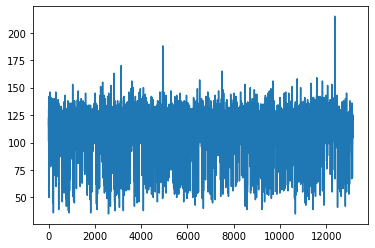

In [ ]:
plt.plot(heights)

In [ ]:
print(np.mean(widths))
print(np.max(widths))
print(np.min(widths))

114.07224884021599
215
35


In [ ]:
print(np.mean(channels))
print(np.max(channels))
print(np.min(channels))

3.0
3
3


In [ ]:
print(heights[0])
print(heights[1])
print(heights[2])
print(heights[3])

122
118
111
120


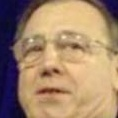

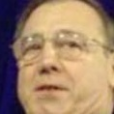

In [ ]:
from google.colab.patches import cv2_imshow

for folder in os.listdir(SOURCE_PATH):
  for image_name in os.listdir(pjoin(SOURCE_PATH, folder)):
    image = cv2.imread(pjoin(SOURCE_PATH, folder, image_name))

    cv2_imshow(image)
    cv2_imshow(cv2.resize(image,(114,114)))
  break

In [ ]:
len(list_detect_failures)


84

In [ ]:
len(os.listdir(SOURCE_PATH))

5749

In [ ]:
count = 0
for folder in os.listdir(SOURCE_PATH):
  if len(os.listdir(pjoin(SOURCE_PATH, folder))) == 0:
    os.rmdir(pjoin(SOURCE_PATH, folder))
    count += 1

count

0

In [ ]:
len(os.listdir(SOURCE_PATH))

5712

In [ ]:
import numpy as np

labels = os.listdir(SOURCE_PATH)
labels.sort()

indexes = np.arange(len(labels))
np.random.seed(5)
np.random.shuffle(indexes)

In [ ]:
indexes[0]

3112

In [ ]:
from PIL import Image
import random
from google.colab.patches import cv2_imshow
random.seed(5)

In [ ]:
count = 0

for index in indexes:
  
  image_names = os.listdir(pjoin(SOURCE_PATH, labels[index]))
  
  random.seed(5)
  random.shuffle(image_names)
  
  try:
    os.mkdir(pjoin(DESTIN_PATH, "positive", labels[index]))
  except:
    None
  
  try:
    os.mkdir(pjoin(DESTIN_PATH, "negative", labels[index]))
  except:
    None
  
  image1 = Image.open(pjoin(SOURCE_PATH, labels[index], image_names[0]))
  image2 = Image.open(pjoin(SOURCE_PATH, labels[index], image_names[-1]))

  image1 = image1.resize((114,114))
  image2 = image2.resize((114,114))


  neg_indexes = np.squeeze(np.where(indexes != index))
  random.seed(5)
  random.shuffle(neg_indexes)
  neg_image_name = os.listdir(pjoin(SOURCE_PATH, labels[neg_indexes[0]]))[0]
  neg_image = Image.open(pjoin(SOURCE_PATH, labels[neg_indexes[0]], neg_image_name))
  neg_image = neg_image.resize((114,114))

  image1.save(pjoin(DESTIN_PATH, "positive", labels[index], "anchor.jpg"))
  image2.save(pjoin(DESTIN_PATH, "positive", labels[index], "positive.jpg"))

  image1.save(pjoin(DESTIN_PATH, "negative", labels[index], "anchor.jpg"))
  neg_image.save(pjoin(DESTIN_PATH, "negative", labels[index], "negative.jpg"))

  count += 1
  if count% 500 == 0 or count == 5712:
    print(count)

print("Completed")

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
5712
Completed


## Face Recognition - Siamese Network

### Architecture

In [ ]:
def get_feature_extraction_block():
  input = tf.keras.Input(shape=(64, 64, 3))

  x = tf.keras.layers.Conv2D(filters=96, kernel_size=(11, 11), padding="same", activation="relu")(input)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(rate=0.3)(x)

  x = tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), padding="same", activation="relu")(input)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(rate=0.3)(x)

  x = tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), padding="same", activation="relu")(input)
  x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
  x = tf.keras.layers.Dropout(rate=0.3)(x)

  avg_pool = tf.keras.layers.GlobalAveragePooling2D()(x)
  output = tf.keras.layers.Dense(1024)(avg_pool)
  output = tf.keras.layers.Dense(128)(output)

  model = tf.keras.Model(inputs=input, outputs=output, name="Feature_Extractor")
  return model

In [ ]:
from tensorflow.keras import backend as k

def euclidean_distance(vectors):
  (featA, featB) = vectors
  sum_squared = k.sum(k.square(featA - featB), axis=1, keepdims=True)
  return k.sqrt(k.maximum(sum_squared, k.epsilon()))

In [ ]:
def get_siamese_network():
  inputA = tf.keras.Input(shape=(64, 64, 3))
  inputB = tf.keras.Input(shape=(64, 64, 3))

  feature_extractor = get_feature_extraction_block()

  featuresA = feature_extractor(inputA)
  featuresB = feature_extractor(inputB)

  distance = tf.keras.layers.Lambda(euclidean_distance)([featuresA, featuresB])
  output = tf.keras.layers.Dense(1, activation="sigmoid")(distance)

  model = tf.keras.Model(inputs=[inputA, inputB], outputs=output, name="Face_Recognition_Module")
  return model

## Building Architecture

In [ ]:
model = get_siamese_network()